<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/machine_learning_3_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망
- 인공 신경망(ANN: Artificial Neural Network)<br/>
: 사람의 신경 세포(뉴런)에서 영감을 받아 인공 신경 세포인 ***퍼셉트론***을 학습시키는 알고리즘 / 1개 이상의 퍼셉트론으로 결합된 모델

- ***활성화 함수***: 입력값의 합계를 받아 출력값 계산(sigmoid, ReLU 등)

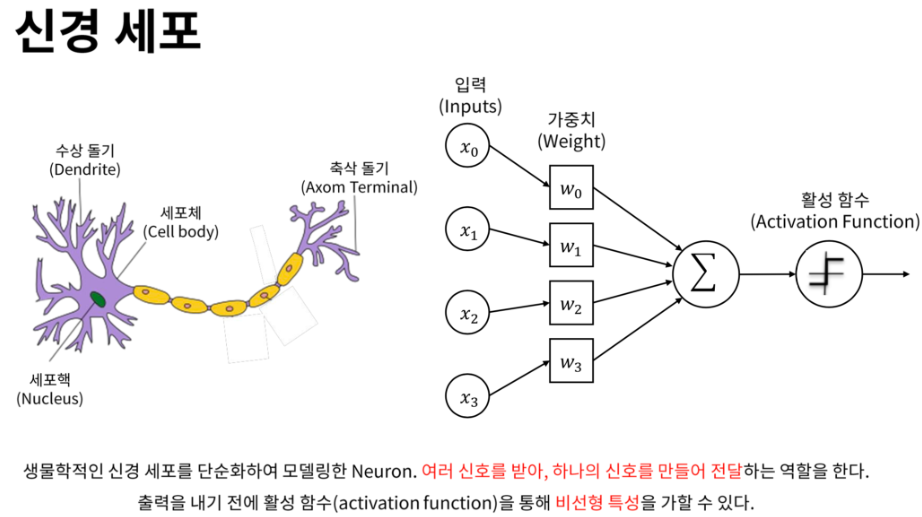

# 심층 신경망
- 다층 퍼셉트론(MLP: Multi Layer Perceptron)
: 입력층, 은닉층, 출력층으로 구성된 신경망 모델

- 입력층: 데이터를 입력받는 노드들로 구성

- 은닉층: ANN 안에서 입력된 값을 계산하여 예상값을 다음 층으로 전달

- 출력층: ANN 마지막 층으로 결괏값 출력되는 노드

- 심층 신경망(DNN: Deep Neural Network)
: 은닉층이 2개 이상인 MLP

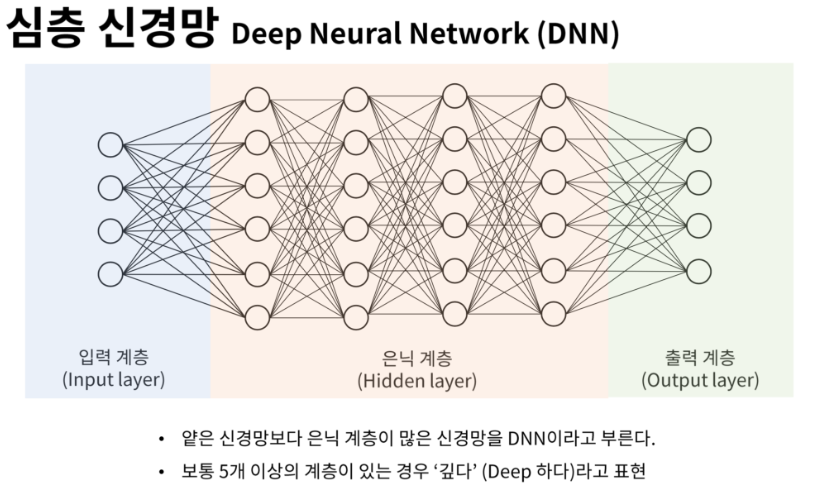
# MNIST 데이터셋
- Modified National Institute of Standards and Technology database
- ***손으로 쓴 숫자***들로 이루어진 대형 데이터베이스
- 총 <U>70,000개</U> / 이미지당 <U>748개의 속성(28x28 픽셀)</U> / 각 픽셀은 <U>0 ~ 255(</U>이미지 밝기) / <U>10개의 레이블(0~9)</U>

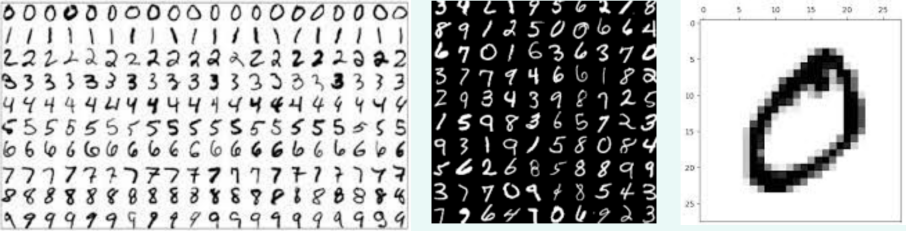

# MNIST 데이터셋

In [ ]:
# sklearn.datasets: 다양한 dataset 제공
# fetch_openml() 함수: 인터넷에서 데이터 다운로드

from sklearn.datasets import fetch_openml
mnist =  fetch_openml('mnist_784', as_frame=False) # 22초 정도 소요

In [ ]:
mnist.data.shape # 총 70,000개의 데이터

(70000, 784)

In [ ]:
import numpy as np
print(mnist.feature_names) # feature_names: pixel 1 ~ 784
print(np.unique(mnist.target)) # target: 레이블은 각 손 글씨 이미지의 정답인 정수 0 ~ 9의 10개의 클래스

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

# 그림 데이터와 속성 레이블 확인

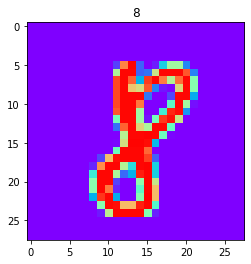

In [ ]:
import matplotlib.pyplot as plt
import random

n = random.randrange(0,69999) # randrange 사용하여 0 ~ 69999번 데이터 사이의 임의로 1개 픽
image = mnist.data[n].reshape(28, 28) # 28 x 28
plt.imshow(image, cmap='rainbow') # cmap: cololrmap / https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.title(mnist.target[n])
plt.show()

# 임의의 연속 데이터 시각화

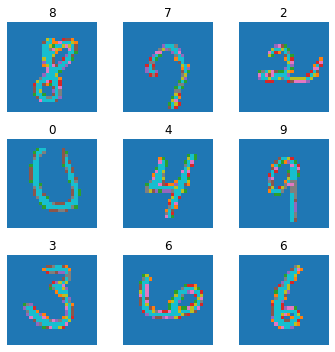

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(mnist.data[n+i].reshape(28,28), 'tab10')
  plt.title(mnist.target[n+i])
  plt.axis('off')
plt.tight_layout()
plt.show()

# 데이터 나누기
- 입력 데이터 ***전체 학습***하여 모델 생성 -> <br/>얼마나 정확한지 신뢰도 평가 어려움
- ***새로운 데이터***가 입력되었을 때 모델이 정확하게 판단하는지 확인 필요
- 정답을 알고 있는 데이터 수는 ***한정***되어 있음
- 70,000개의 데이터 전체를 학습하는 것이 아니라 ***나누어*** 학습/테스트 필요<br/>
<br/>

## train_test_split 함수 사용
#### test_size 옵션: tarin/test를 7:3으로 지정(default 7.5:2.5)
#### staratify 옵션: 레이블별 비율 맞춰서 나눔<br/>
#### -> 한쪽 레이블로 몰리지 않아 학습 및 신뢰도 상승

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,
                                                    test_size = 0.3, stratify = mnist.target)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 70,000 x 0.3 = 49,000

(49000, 784) (21000, 784) (49000,) (21000,)


# 딥러닝 모델 구성
- ***입력층,은닉층, 출력층 명시***
- ***손실 함수와 최적화 함수*** 등의 학습 방법 명시
- ***MLPClasifier*** 사용 (직접 구현 X)

In [ ]:
from sklearn.neural_network import MLPClassifier # MLP: Multi Layer Perceptron
model = MLPClassifier(hidden_layer_sizes=(200, 50), # 은닉층 200, 50 노드
                      activation='relu', # 활성화 함수 ReLU 사용
                      solver='adam', # 최적화 함수 adam
                      max_iter=50, # 반복학습 50회 (epoch), 설정하지 않으면 100회
                      verbose=1) # 학습과정 보이도록  설정
# hidden_layer_sizes에서 은닉층 개수도 설정 가능

In [ ]:
model.fit(X_train, y_train) # 10회 반복하는 동안 손실률(loss) 줄어드는 것 확인 가능 = 학습 잘 되고 있음

Iteration 1, loss = 2.98533422
Iteration 2, loss = 0.66287147
Iteration 3, loss = 0.36504703
Iteration 4, loss = 0.24225294
Iteration 5, loss = 0.17626755
Iteration 6, loss = 0.14433223
Iteration 7, loss = 0.11292501
Iteration 8, loss = 0.10079724
Iteration 9, loss = 0.08974749
Iteration 10, loss = 0.09663253
Iteration 11, loss = 0.09347026
Iteration 12, loss = 0.08384731
Iteration 13, loss = 0.07394022
Iteration 14, loss = 0.07426524
Iteration 15, loss = 0.07979519
Iteration 16, loss = 0.08414622
Iteration 17, loss = 0.07257254
Iteration 18, loss = 0.06010978
Iteration 19, loss = 0.07142648
Iteration 20, loss = 0.06374309
Iteration 21, loss = 0.05659720
Iteration 22, loss = 0.05809600
Iteration 23, loss = 0.04571657
Iteration 24, loss = 0.04905045
Iteration 25, loss = 0.05709183
Iteration 26, loss = 0.05103699
Iteration 27, loss = 0.04558888
Iteration 28, loss = 0.04318739
Iteration 29, loss = 0.03418824
Iteration 30, loss = 0.04270710
Iteration 31, loss = 0.03559810
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=50, verbose=1)

# 손실률 변화 시각화
### - 손실률 변화는 ***loss_curve_*** 리스트에 저장
### - ***epoch***: 훈련 데이터 전체를 한 번 학습하는 것을 지칭하는 용어<br>
국룰: sklearn에서는 ***max_iter 옵션***으로 사용

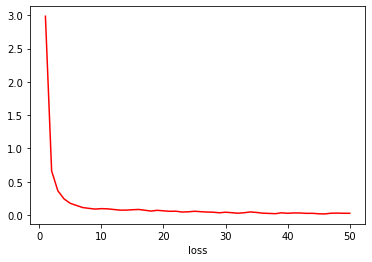

In [ ]:
loss_values = model.loss_curve_ 
# loss curve: https://dataplay.tistory.com/32
line_x = np.arange(1, len(loss_values)+1)
plt.plot(line_x, loss_values, 'r')
plt.xlabel('ephocs')
plt.xlabel('loss')
plt.show()

# 모델 평가
#### - 학습에 사용하지 않은 새로운 데이터인 ***테스트 데이터***로 입력
#### - 모델이 삭습한 예상값과 테스트 레이블 비교하여 ***정확도 측정: score 함수***

In [ ]:
print("Test set score: ", model.score(X_test, y_test)) #94%

Test set score:  0.9463333333333334


# 에폭을 *늘리거나 줄였을 때* 정확도가 어떻게 처리되는지 확인
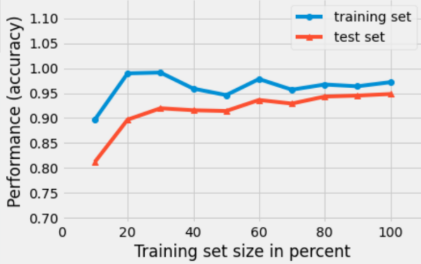